### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




In [8]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [9]:
X.shape

(2000, 20)

In [10]:
y.shape

(2000,)

In [11]:
y


array([0, 0, 0, ..., 1, 1, 0])

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [16]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9819166666666667


In [17]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [0.19, 0.81]])

#### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [22]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9846222222222223


In [23]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.94,0.966929,0.538202,0.8
3,0.90,0.761539,0.509875,0.8
4,0.52,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.00,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [24]:
final_prediction

0      0.882762
1      0.118323
2      0.811283
3      0.742853
4      0.547447
         ...   
595    0.121340
596    0.110345
597    0.879197
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [25]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90174686, 0.90077475, 0.80546097,
       0.8030558 , 0.8019465 , 0.79912833, 0.77498136, 0.77321156,
       0.76553202, 0.76537124, 0.72958108, 0.72887362, 0.69538086,
       0.69393711, 0.66692282, 0.65993537, 0.60279968, 0.59736186,
       0.5921569 , 0.58925354, 0.57649047, 0.57550386, 0.57338469,
       0.56389283, 0.54744674, 0.54377948, 0.53865858, 0.49616892,
       0.45740225, 0.43936151, 0.4346034 , 0.38420009, 0.38379719,
       0.34518074, 0.34086612, 0.23349466, 0.23140421, 0.19688001,
       0.19598417, 0.11790921, 0.1178351 , 0.10498954])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
31,0.439362,0.960000
30,0.457402,0.960000
32,0.434603,0.958333
29,0.496169,0.958333
27,0.543779,0.958333


In [27]:
accuracy_ls

,thresholds,accuracy
31,0.439362,0.960000
30,0.457402,0.960000
32,0.434603,0.958333
29,0.496169,0.958333
27,0.543779,0.958333
28,0.538659,0.956667
26,0.547447,0.956667
23,0.575504,0.955000
22,0.576490,0.953333
25,0.563893,0.953333


In [28]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

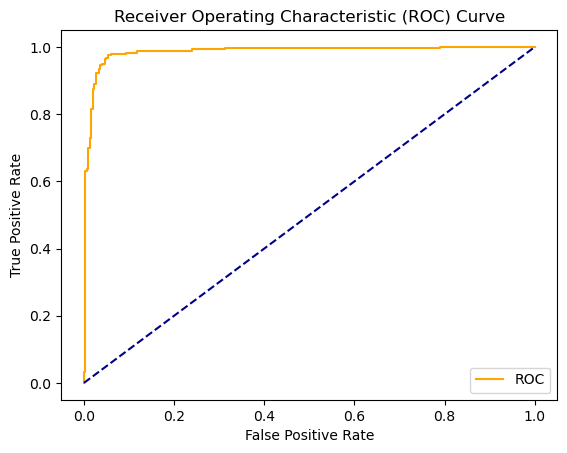

In [29]:
plot_roc_curve(fpr,tpr)